<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Drug's_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'objectif est de predire le medicament que doit prendre un patient en fonction des  symptomes basees sur certaines caracteristiques

In [ ]:
# importations des bibliotheques

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sns

In [ ]:
# Downloading dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:

# info sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# description (statistiques)
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# verification des elements de chaque feature
df.nunique().value_counts()

2      2
57     1
3      1
198    1
5      1
Name: count, dtype: int64

In [ ]:
df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
# apres verification des data , elles sont exp;oitatables.
# Donc pas de feature egineering


In [ ]:
# separation des data en  features et label




In [ ]:
X = df.drop("Drug", axis= 1).values # on supprime la feature cibelle
X[0:5] # on affiche les 5 premierss liges

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
# transformation des variables discretes en variables continues
from sklearn import preprocessing


In [ ]:
le_sex = preprocessing.LabelEncoder() # on cree un objet LabelEcoder()
le_sex.fit(['F','M']) # on l'entraine sur les element
X[:,1] = le_sex.transform(X[:,1]) # on l'applique


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
# notre  variable ciblle a predire
y = df['Drug'].values
y[0:5] # on affiche les 5 premierss liges

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

Separation du data set en train and test dataset

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape

(140, 5)

Modeling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # on cree un model d;arbre de decision
model # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Entrainnement de notre model

In [ ]:
trainModel = model.fit(X_train, y_train) # entrainnement de notre model sur nos donnees d'entrainement

PreDiction sur notre model entraine

In [ ]:
y_pred = trainModel.predict(X_test)

In [ ]:
print(f"Variable cible d'entrainement : \t {y_train[0:10]}")
print(f"Variable cible predite : \t {y_pred[0:10]}")

Variable cible d'entrainement : 	 ['drugY' 'drugY' 'drugY' 'drugA' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugY']
Variable cible predite : 	 ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']


Evaluation du model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
mesure = accuracy_score(y_test, y_pred)
mesure

0.9833333333333333

In [ ]:
print(f"Mon model est performant a : \t {mesure}")

Mon model est performant a : 	 0.9833333333333333


Visualisation de notre arbre de decision

In [ ]:
from sklearn.tree import plot_tree

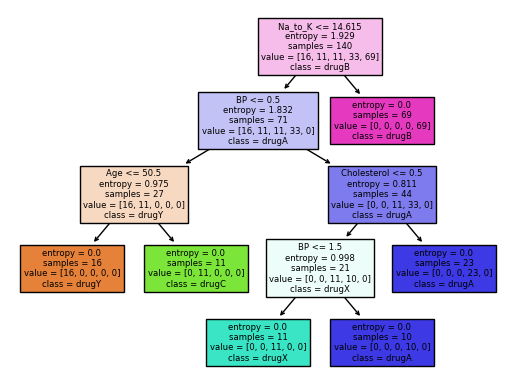

In [ ]:
plot_tree(trainModel, max_depth=4, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], filled=True, class_names=df['Drug'].unique());

In [ ]:
df.drop("Drug", axis= 1).columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')